In [1]:
import numpy as np
import os
import torch
from matplotlib import cm, colors
from sklearn.manifold import TSNE
import pickle5 as pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

alist=[
    "something1",
    "something12",
    "something17",
    "something2",
    "something25",
    "something29"]

alist.sort(key=natural_keys)
print(alist)

['something1', 'something2', 'something12', 'something17', 'something25', 'something29']


# Fig:probing-vanilla-apc-spkid

In [50]:
figdir = "./figures/probing-vanilla-apc-spkid"

## Train

In [51]:
def fetch_loss_epoch(file_list):
    loss =  {}
    exp_name = os.path.join(*file_list[0].split("/")[:-1])
    loss["exp_name"] = exp_name
    loss["losses"] = []


    for file in file_list:
        count = 0
        current_loss = 0
        with open(file, 'r') as f:
            for line in f:
                line = line.strip()
                if line.startswith("average loss per batch: "):
                    current_loss += float(line.split(":")[-1])
                    count += 1
        loss["losses"].append(current_loss/count)
    return loss["exp_name"], loss["losses"]

In [52]:
baseline1_folder = "../spkid/exp/spkid/vanilla/woc/layer1"
baseline2_folder = "../spkid/exp/spkid/vanilla/woc/layer2"
baseline3_folder = "../spkid/exp/spkid/vanilla/woc/layer3"

baseline1 = os.listdir(baseline1_folder)
baseline2 = os.listdir(baseline2_folder)
baseline3 = os.listdir(baseline3_folder)

baseline1 = [os.path.join(baseline1_folder, file) for file in baseline1 if file.startswith("log")]
baseline1.sort(key=natural_keys)
baseline2 = [os.path.join(baseline2_folder, file) for file in baseline2 if file.startswith("log")]
baseline2.sort(key=natural_keys)
baseline3 = [os.path.join(baseline3_folder, file) for file in baseline3 if file.startswith("log")]
baseline3.sort(key=natural_keys)

In [53]:
baseline1_name , loss_baseline1 = fetch_loss_epoch(baseline1)
baseline2_name , loss_baseline2 = fetch_loss_epoch(baseline2)
baseline3_name , loss_baseline3 = fetch_loss_epoch(baseline3)
baseline1_name,baseline2_name,baseline3_name = "APCLayer1-train","APCLayer2-train","APCLayer3-train"

In [54]:
viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)

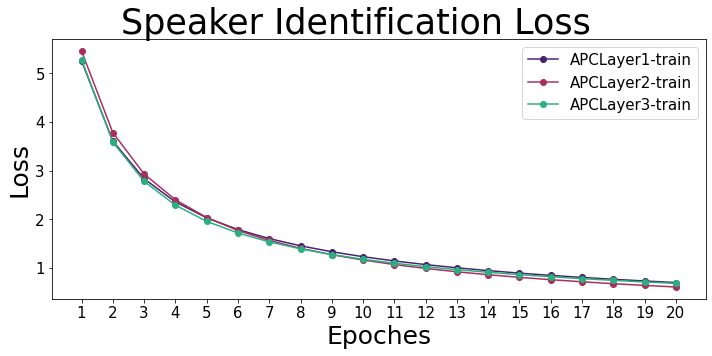

In [55]:
x1, y1 = np.arange(1,21), loss_baseline1
x2, y2 = np.arange(1,21), loss_baseline2
x3, y3 = np.arange(1,21), loss_baseline3

fig = plt.figure(figsize=(10,5))
plt.plot(x1, y1,label=baseline1_name, marker = 'o', color = viridis(0.15))
plt.plot(x2, y2,label=baseline2_name, marker = 'o', color = inferno(0.45))
plt.plot(x3, y3,label=baseline3_name, marker = 'o', color = viridis(0.65))
plt.xticks(np.arange(1,21),fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
# Setting the fontsize of the axis label to 10
plt.xlabel('Epoches', fontsize=25)
plt.ylabel('Loss', fontsize=25)
plt.suptitle('Speaker Identification Loss', fontsize=35)
plt.tight_layout()
plt.subplots_adjust(top=0.89)
plt.show()

fig.savefig(figdir + os.sep + "APC-TrainLoss", dpi=200, bbox_inches='tight')

## Dev

In [56]:
def fetch_loss_epoch(file_list):
    loss =  {}
    exp_name = os.path.join(*file_list[0].split("/")[:-1])
    loss["exp_name"] = exp_name
    loss["losses"] = []

    for file in file_list:
        with open(file, 'r') as f:
            lines = f.read().splitlines()
            last_line = lines[-1]
            loss["losses"].append(float(last_line.split(":")[-1]))
    return loss["exp_name"], loss["losses"]

In [57]:
baseline1_folder = "../spkid/exp/spkid/vanilla/woc/layer1"
baseline2_folder = "../spkid/exp/spkid/vanilla/woc/layer2"
baseline3_folder = "../spkid/exp/spkid/vanilla/woc/layer3"

baseline1 = os.listdir(baseline1_folder)
baseline2 = os.listdir(baseline2_folder)
baseline3 = os.listdir(baseline3_folder)

baseline1 = [os.path.join(baseline1_folder, file) for file in baseline1 if file.endswith("eval.log")]
baseline1.sort(key=natural_keys)
baseline2 = [os.path.join(baseline2_folder, file) for file in baseline2 if file.endswith("eval.log")]
baseline2.sort(key=natural_keys)
baseline3 = [os.path.join(baseline3_folder, file) for file in baseline3 if file.endswith("eval.log")]
baseline3.sort(key=natural_keys)

In [58]:
baseline1_name , loss_baseline1 = fetch_loss_epoch(baseline1)
baseline2_name , loss_baseline2 = fetch_loss_epoch(baseline2)
baseline3_name , loss_baseline3 = fetch_loss_epoch(baseline3)
baseline1_name,baseline2_name,baseline3_name = "APCLayer1-dev","APCLayer2-dev","APCLayer3-dev"

In [59]:
viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)

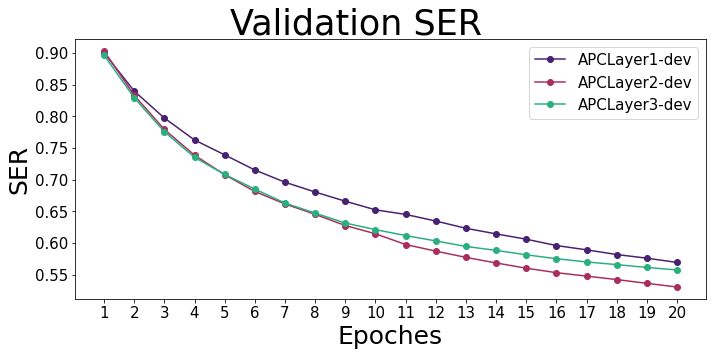

In [60]:
x1, y1 = np.arange(1,21), loss_baseline1
x2, y2 = np.arange(1,21), loss_baseline2
x3, y3 = np.arange(1,21), loss_baseline3

fig = plt.figure(figsize=(10,5))
plt.plot(x1, y1,label=baseline1_name, marker = 'o', color = viridis(0.15))
plt.plot(x2, y2,label=baseline2_name, marker = 'o', color = inferno(0.45))
plt.plot(x3, y3,label=baseline3_name, marker = 'o', color = viridis(0.65))
plt.xticks(np.arange(1,21),fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
# Setting the fontsize of the axis label to 10
plt.xlabel('Epoches', fontsize=25)
plt.ylabel('SER', fontsize=25)
plt.suptitle('Validation SER', fontsize=35)
plt.tight_layout()
plt.subplots_adjust(top=0.89)
plt.show()

fig.savefig(figdir + os.sep + "APC-DevLoss", dpi=200, bbox_inches='tight')

**APC Layers Loss**

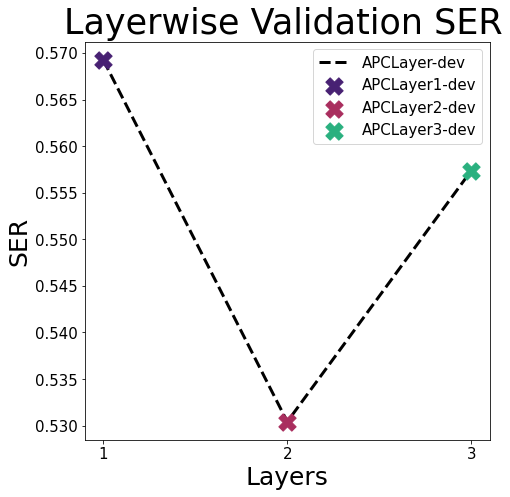

In [61]:
x1, y1 = np.arange(1,4), [loss_baseline1[-1],loss_baseline2[-1],loss_baseline3[-1]]
fig = plt.figure(figsize=(7,7))
plt.plot(x1, y1,label="APCLayer-dev", color = "Black",linewidth=3.0, linestyle='dashed', zorder=1)
plt.scatter(1, y1[0],label="APCLayer1-dev", marker = 'X', color = viridis(0.15), s=300, zorder=2)
plt.scatter(2, y1[1],label="APCLayer2-dev", marker = 'X', color = inferno(0.45), s=300, zorder=2)
plt.scatter(3, y1[2],label="APCLayer3-dev", marker = 'X', color = viridis(0.65), s=300, zorder=2)
plt.xticks(np.arange(1,4),fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
# Setting the fontsize of the axis label to 10
plt.xlabel('Layers', fontsize=25)
plt.ylabel('SER', fontsize=25)
plt.suptitle('Layerwise Validation SER', fontsize=35, x=0.57)
plt.tight_layout()
plt.subplots_adjust(top=0.91)
plt.show()

fig.savefig(figdir + os.sep + "APC-LayerwiseLoss", dpi=200, bbox_inches='tight')

# Fig: PCA-vanilla-APC

In [62]:
figdir = "./figures/pca-vanilla-apc"

In [63]:
with open('./exp/lstm-512x3/layer1_param-15.pkl', 'rb') as f:
    reps_layer1 = pickle.load(f)
with open('./exp/lstm-512x3/layer2_param-15.pkl', 'rb') as f:
    reps_layer2 = pickle.load(f)
with open('./exp/lstm-512x3/layer3_param-15.pkl', 'rb') as f:
    reps_layer3 = pickle.load(f)

In [64]:
ids = [int(sample['key'].split("-")[0]) for sample in reps_layer2]
unique_ids = np.unique(ids)

In [65]:
speaker_ids = unique_ids[:10]

print(speaker_ids)

selects_label = []
selects_reps_layer1 = []
selects_reps_layer2 = []
selects_reps_layer3 = []

for i in range(0,len(ids)):
    key = reps_layer1[i]['key']
    if int(key.split("-")[0]) in speaker_ids:
        key, utt = reps_layer1[i]['key'], reps_layer1[i]['utt_embeddings'].numpy()
        selects_reps_layer1.append(utt)
        key, utt = reps_layer2[i]['key'], reps_layer2[i]['utt_embeddings'].numpy()
        selects_reps_layer2.append(utt)
        key, utt = reps_layer3[i]['key'], reps_layer3[i]['utt_embeddings'].numpy()
        selects_reps_layer3.append(utt)

        selects_label.append(int(key.split("-")[0]))


reps_layer1 = np.array(selects_reps_layer1, dtype=float)
reps_layer2 = np.array(selects_reps_layer2, dtype=float)
reps_layer3 = np.array(selects_reps_layer3, dtype=float)

[  84  174  251  422  652  777 1272 1462 1673 1919]


In [66]:
unique_label = list(np.unique(selects_label))
color_range  = np.linspace(0,1,len(np.unique(selects_label)))
color_label  = [unique_label.index(label) for label in selects_label]

In [69]:
mode = "TSNE"
if mode == "PCA":
    pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=50))])
if mode == "TSNE":
    pipeline = Pipeline([('scaling', StandardScaler()), ('tsne', TSNE(n_components=2, learning_rate=100, perplexity=3))])

compressed_reps_layer1 = pipeline.fit_transform(reps_layer1)
compressed_reps_layer2 = pipeline.fit_transform(reps_layer2)
compressed_reps_layer3 = pipeline.fit_transform(reps_layer3)

/Users/webkasidit/opt/anaconda3/envs/StyleGAN/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/webkasidit/opt/anaconda3/envs/StyleGAN/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/webkasidit/opt/anaconda3/envs/StyleGAN/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


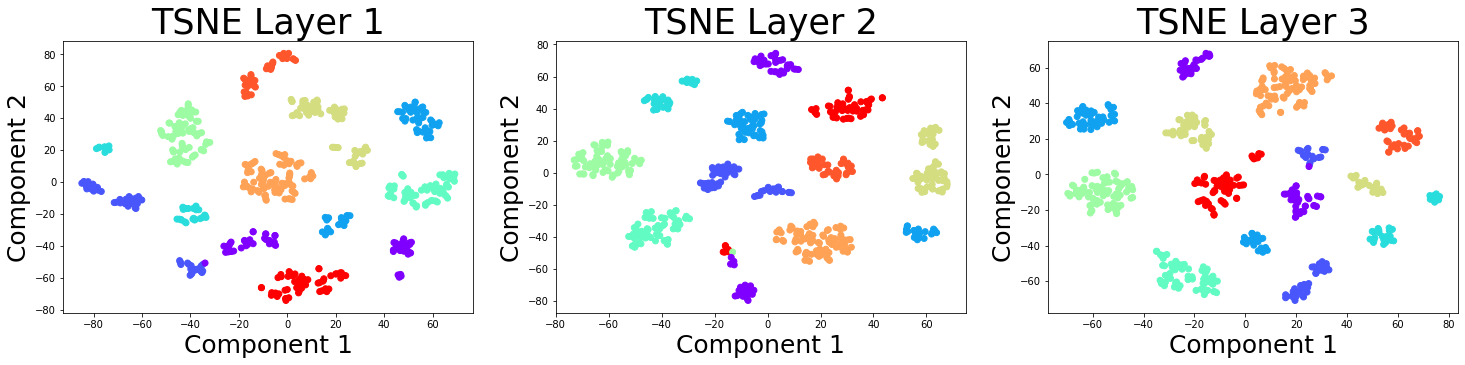

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(5)
fig.set_figwidth(25)

ax1.set_title(mode +' Layer 1', fontsize=35)
ax1.scatter(compressed_reps_layer1[:,0], compressed_reps_layer1[:,1], c=color_label , cmap='rainbow')
ax1.set_xlabel('Component 1', fontsize=25)
ax1.set_ylabel('Component 2', fontsize=25)

ax2.set_title(mode +' Layer 2', fontsize=35)
ax2.scatter(compressed_reps_layer2[:,0], compressed_reps_layer2[:,1], c=color_label , cmap='rainbow')
ax2.set_xlabel('Component 1', fontsize=25)
ax2.set_ylabel('Component 2', fontsize=25)

ax3.set_title(mode +' Layer 3', fontsize=35)
ax3.scatter(compressed_reps_layer3[:,0], compressed_reps_layer3[:,1], c=color_label , cmap='rainbow')
ax3.set_xlabel('Component 1', fontsize=25)
ax3.set_ylabel('Component 2', fontsize=25)

fig.savefig(figdir + os.sep + mode + "-vanilla-apc", dpi=200, bbox_inches='tight')

# Fig:layerwise-phone-classification-temporal

In [94]:
figdir = "./figures/layerwise-phone-classification-temporal"

In [95]:
expfiles = []
for dirpath, subdirs, files in os.walk("../frmcls/exp/frmcls/"):
    for x in files:
        if x.endswith("10-eval.log"):
            expfiles.append(os.path.join(dirpath, x))

In [96]:
exps = []

for file in expfiles:

    args = file.split("/")

    exp = {}
    exp["config"] = {}
    exp["config"]["embedding_mode"] = args[4]
    exp["config"]["connection_mode"] = args[5]

    lookup_layer = {"layer1":1, "layer2":2, "layer3":3}

    if args[6] in ["residual","concat","squeeze"]:
        exp["config"]["augment_mode"] = args[6]
        exp["config"]["layer"] = lookup_layer[args[7]]
        exp["config"]["extract_mode"] = args[8]
    else:
        exp["config"]["augment_mode"] = None
        exp["config"]["layer"] = lookup_layer[args[6]]
        exp["config"]["extract_mode"] = None

    exp["result"] = {}
    with open(file, 'r') as f:
        lines = f.read().splitlines()
        exp_results = [x.strip() for x in lines[-1].split(",")]

        for param in exp_results:
            out = param.split(":")
            param_name =  out[0]
            param_value = float(out[1].strip())
            exp["result"][param_name] = param_value
    
    exps.append(exp)

In [97]:
apc_vanilla = list(filter(lambda x: x["config"]['embedding_mode'] == 'vanilla' and x["config"]["connection_mode"] == "woc", exps))
residual =  list(filter(lambda x: x["config"]['embedding_mode'] == 'temporal' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "residual", exps))
concat =  list(filter(lambda x: x["config"]['embedding_mode'] == 'temporal' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "concat", exps))
squeeze =  list(filter(lambda x: x["config"]['embedding_mode'] == 'temporal' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "squeeze", exps))

In [98]:
def get_plot_val(exps, augment_mode="residual"):
    loss_baseline = []
    loss_postfrm = []
    loss_prefrm = []
    loss_postfrm_wstat = []
    loss_prefrm_wstat = []

    for exp in exps: 
        if exp["config"]['embedding_mode'] == 'vanilla':
            loss_baseline.append(exp["result"]["rate"])
        if exp["config"]['embedding_mode'] == 'temporal' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="preframe":
            loss_prefrm.append(exp["result"]["rate"])
        if exp["config"]['embedding_mode'] == 'temporal' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="postframe":
            loss_postfrm.append(exp["result"]["rate"])
        if exp["config"]['embedding_mode'] == 'statistic' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="preframe":
            loss_prefrm_wstat.append(exp["result"]["rate"])
        if exp["config"]['embedding_mode'] == 'statistic' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="postframe":
            loss_postfrm_wstat.append(exp["result"]["rate"])

    y1 = loss_baseline
    y2 = loss_postfrm
    y3 = loss_prefrm
    y4 = loss_postfrm_wstat
    y5 = loss_prefrm_wstat

    return y1,y2,y3,y4,y5

In [99]:
select_exps = apc_vanilla + residual + concat  + squeeze 

In [100]:
viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)

area_color = inferno(0.30)
prefrm_color = inferno(0.15)
postfrm_color = inferno(0.65)

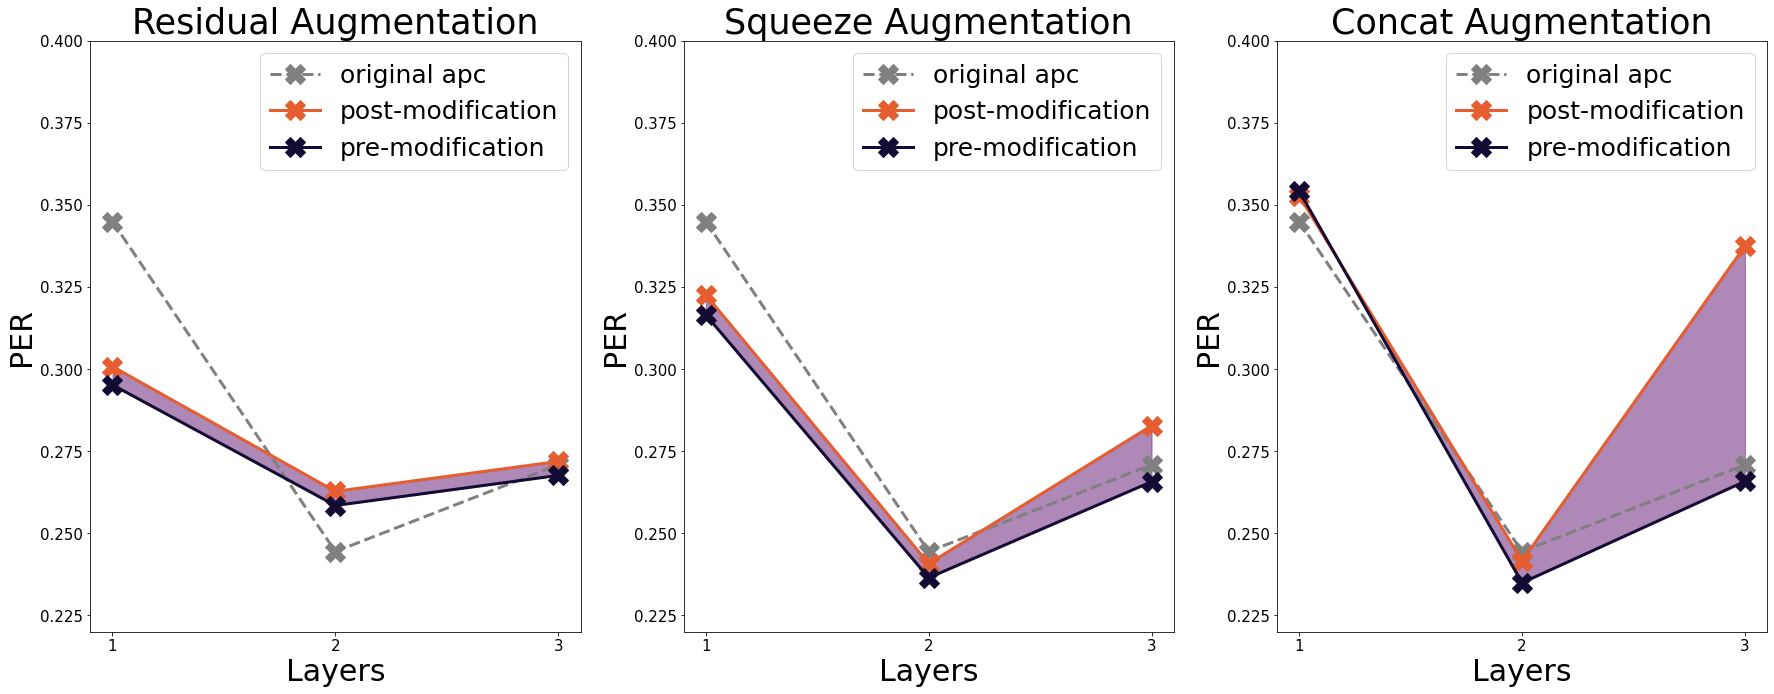

In [101]:
x = np.arange(1,4)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(10)
fig.set_figwidth(25)

y1,y2,y3,y4,y5 = get_plot_val(select_exps,"residual")
ax1.set_title('Residual Augmentation', fontsize=35)
ax1.plot(x, y1,label='original apc', marker = 'X', color ="gray", linewidth=3, linestyle="dashed",markersize=20)
ax1.plot(x, y2,label='post-modification', marker = 'X',markersize=20, linewidth=3, color=postfrm_color)
ax1.plot(x, y3,label='pre-modification', marker = 'X',markersize=20, linewidth=3, color=prefrm_color)
ax1.set_xlabel('Layers', fontsize=30)
ax1.set_ylabel('PER', fontsize=30)
ax1.fill_between(x, y2,y3,color=area_color,alpha=.5)
ax1.set_xticks(np.arange(1,4))
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylim(0.22,0.40)
ax1.legend(fontsize=25)

y1,y2,y3,y4,y5 = get_plot_val(select_exps,"squeeze")
ax2.set_title('Squeeze Augmentation', fontsize=35)
ax2.plot(x, y1,label='original apc', marker = 'X', color ="gray", linewidth=3, linestyle="dashed",markersize=20)
ax2.plot(x, y2,label='post-modification', marker = 'X',markersize=20, linewidth=3, color=postfrm_color)
ax2.plot(x, y3,label='pre-modification', marker = 'X',markersize=20, linewidth=3, color=prefrm_color)
ax2.set_xlabel('Layers', fontsize=30)
ax2.set_ylabel('PER', fontsize=30)
ax2.fill_between(x, y2,y3,color=area_color,alpha=.5)
ax2.set_xticks(np.arange(1,4),fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_ylim(0.22,0.40)
ax2.legend(fontsize=25)


y1,y2,y3,y4,y5 = get_plot_val(select_exps,"concat")
ax3.set_title('Concat Augmentation', fontsize=35)
ax3.plot(x, y1,label='original apc', marker = 'X', color ="gray", linewidth=3, linestyle="dashed",markersize=20)
ax3.plot(x, y2,label='post-modification', marker = 'X',markersize=20, linewidth=3, color=postfrm_color)
ax3.plot(x, y3,label='pre-modification', marker = 'X',markersize=20, linewidth=3, color=prefrm_color)
ax3.set_xlabel('Layers', fontsize=30)
ax3.set_ylabel('PER', fontsize=30)
ax3.fill_between(x, y2,y3,color=area_color,alpha=.5)
ax3.set_xticks(np.arange(1,4),fontsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax3.set_ylim(0.22,0.40)
ax3.legend(fontsize=25)

# using padding
fig.tight_layout(pad=2.0)

plt.show()

fig.savefig(figdir + os.sep + "utt-modelling-frmcls.png", dpi=200, bbox_inches='tight')

# Fig:layerwise-speaker-identification-temporal

In [80]:
figdir = "./figures/layerwise-speaker-identification-temporal"

In [81]:
expfiles = []
for dirpath, subdirs, files in os.walk("../spkid/exp/spkid/"):
    for x in files:
        if x.endswith("20-eval.log"):
            expfiles.append(os.path.join(dirpath, x))

In [82]:
exps = []

for file in expfiles:

    args = file.split("/")

    exp = {}
    exp["config"] = {}
    exp["config"]["embedding_mode"] = args[4]
    exp["config"]["connection_mode"] = args[5]

    lookup_layer = {"layer1":1, "layer2":2, "layer3":3}

    if args[6] in ["residual","concat","squeeze"]:
        exp["config"]["augment_mode"] = args[6]
        exp["config"]["layer"] = lookup_layer[args[7]]
        exp["config"]["extract_mode"] = args[8]
    else:
        exp["config"]["augment_mode"] = None
        exp["config"]["layer"] = lookup_layer[args[6]]
        exp["config"]["extract_mode"] = None

    exp["result"] = {}
    with open(file, 'r') as f:
        lines = f.read().splitlines()
        exp_results = [x.strip() for x in lines[-1].split(",")]

        for param in exp_results:
            out = param.split(":")
            param_name =  out[0]
            param_value = float(out[1].strip())
            exp["result"][param_name] = param_value
    
    exps.append(exp)

In [83]:
apc_vanilla = list(filter(lambda x: x["config"]['embedding_mode'] == 'vanilla' and x["config"]["connection_mode"] == "woc", exps))
residual =  list(filter(lambda x: x["config"]['embedding_mode'] == 'temporal' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "residual", exps))
concat =  list(filter(lambda x: x["config"]['embedding_mode'] == 'temporal' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "concat", exps))
squeeze =  list(filter(lambda x: x["config"]['embedding_mode'] == 'temporal' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "squeeze", exps))

In [84]:
def get_plot_val(exps, augment_mode="residual"):
    loss_baseline = []
    loss_postfrm = []
    loss_uttvec = []
    loss_postfrm_wstat = []
    loss_uttvec_wstat = []

    for exp in exps: 
        if exp["config"]['embedding_mode'] == 'vanilla':
            loss_baseline.append(exp["result"]["rate"])
        if exp["config"]['embedding_mode'] == 'temporal' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="utterance-vector":
            loss_uttvec.append(exp["result"]["rate"])
        if exp["config"]['embedding_mode'] == 'temporal' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="postframe":
            loss_postfrm.append(exp["result"]["rate"])
        if exp["config"]['embedding_mode'] == 'statistic' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="utterance-vector":
            loss_uttvec_wstat.append(exp["result"]["rate"])
        if exp["config"]['embedding_mode'] == 'statistic' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="postframe":
            loss_postfrm_wstat.append(exp["result"]["rate"])

    y1 = loss_baseline
    y2 = loss_postfrm
    y3 = loss_uttvec
    y4 = loss_postfrm_wstat
    y5 = loss_uttvec_wstat

    return y1,y2,y3,y4,y5

In [85]:
viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)

area_color = viridis(0.30)
uttvec_color = viridis(0.45)
postfrm_color = viridis(0.15)

In [86]:
select_exps = apc_vanilla + residual + concat + squeeze 

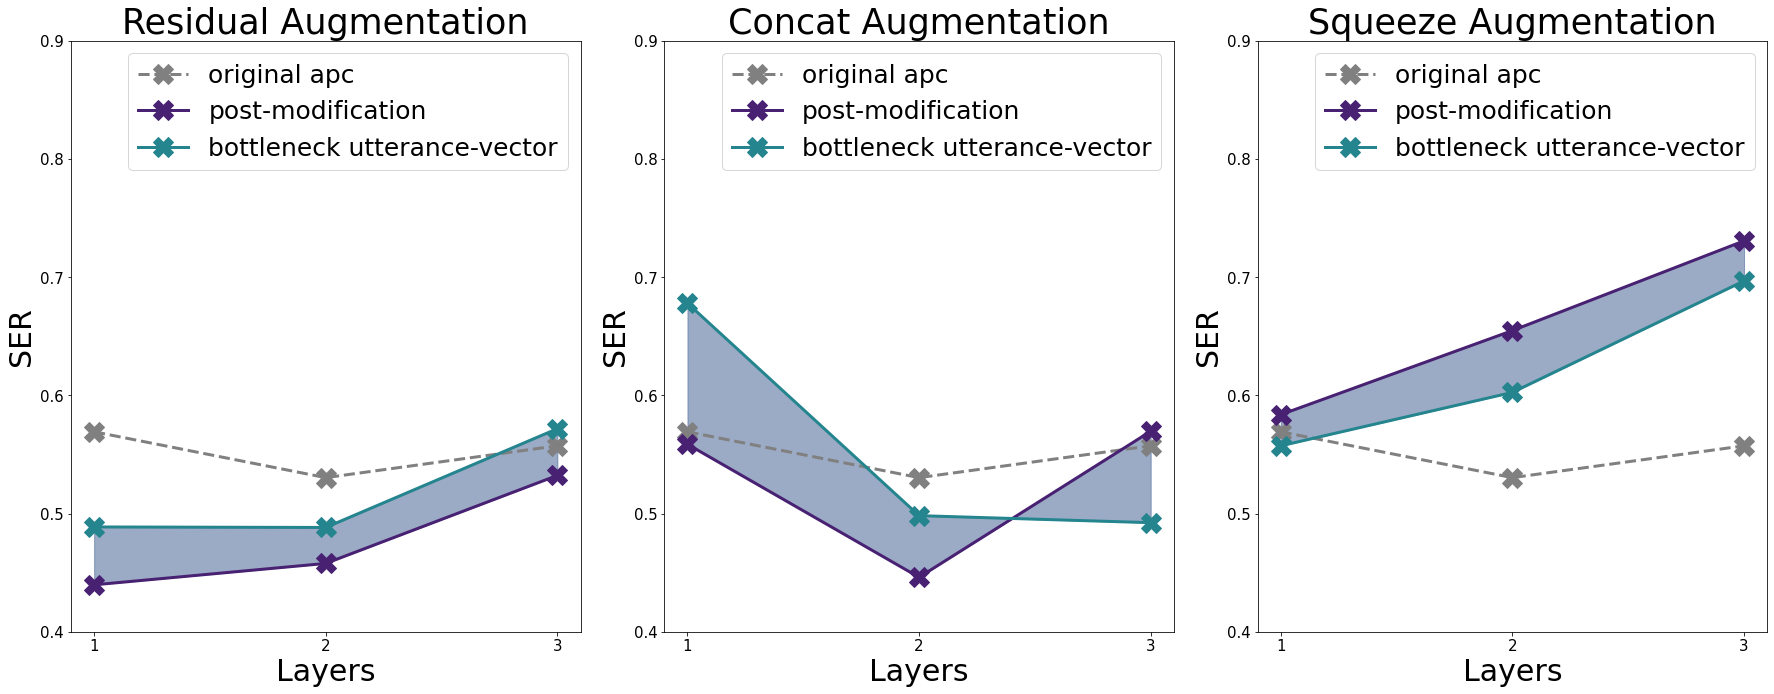

In [91]:
x = np.arange(1,4)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(10)
fig.set_figwidth(25)


y1,y2,y3,y4,y5 = get_plot_val(select_exps,"residual")
ax1.set_title('Residual Augmentation', fontsize=35)
ax1.plot(x, y1,label='original apc', marker = 'X', color ="gray", linewidth=3, linestyle="dashed",markersize=20)
ax1.plot(x, y2,label='post-modification', marker = 'X',markersize=20, linewidth=3, color=postfrm_color)
ax1.plot(x, y3,label='bottleneck utterance-vector', marker = 'X',markersize=20, linewidth=3, color=uttvec_color)
ax1.fill_between(x, y2,y3,color=area_color,alpha=.5)
ax1.set_xlabel('Layers', fontsize=30)
ax1.set_ylabel('SER', fontsize=30)
ax1.set_xticks(np.arange(1,4))
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylim(0.40,0.90)
ax1.legend(fontsize=25)


y1,y2,y3,y4,y5 = get_plot_val(select_exps,"concat")
ax2.set_title('Concat Augmentation', fontsize=35)
ax2.plot(x, y1,label='original apc', marker = 'X', color ="gray", linewidth=3, linestyle="dashed",markersize=20)
ax2.plot(x, y2,label='post-modification', marker = 'X',markersize=20, linewidth=3, color=postfrm_color)
ax2.plot(x, y3,label='bottleneck utterance-vector', marker = 'X',markersize=20, linewidth=3, color=uttvec_color)
ax2.fill_between(x, y2,y3,color=area_color,alpha=.5)
ax2.set_xlabel('Layers', fontsize=30)
ax2.set_ylabel('SER', fontsize=30)
ax2.set_xticks(np.arange(1,4))
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_ylim(0.40,0.90)
ax2.legend(fontsize=25)

y1,y2,y3,y4,y5 = get_plot_val(select_exps,"squeeze")
ax3.set_title('Squeeze Augmentation', fontsize=35)
ax3.plot(x, y1,label='original apc', marker = 'X', color ="gray", linewidth=3, linestyle="dashed",markersize=20)
ax3.plot(x, y2,label='post-modification', marker = 'X',markersize=20, linewidth=3, color=postfrm_color)
ax3.plot(x, y3,label='bottleneck utterance-vector', marker = 'X',markersize=20, linewidth=3, color=uttvec_color)
ax3.fill_between(x, y2,y3,color=area_color,alpha=.5)
ax3.set_xlabel('Layers', fontsize=30)
ax3.set_ylabel('SER', fontsize=30)
ax3.set_xticks(np.arange(1,4))
ax3.tick_params(axis='both', which='major', labelsize=15)
ax3.set_ylim(0.40,0.90)
ax3.legend(fontsize=25)

# using padding
fig.tight_layout(pad=2.0)

plt.show()

fig.savefig(figdir + os.sep + "utt-modelling-spkid.png", dpi=200, bbox_inches='tight')

# Fig:layerwise-speaker-identification-temporal-confusion

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

In [45]:
figdir = "./figures/layerwise-speaker-identification-temporal"

In [46]:
expfiles = []
for dirpath, subdirs, files in os.walk("../spkid/exp/spkid/"):
    for x in files:
        if x.endswith("20-eval.log"):
            expfiles.append(os.path.join(dirpath, x))

In [47]:
exps = []

for file in expfiles:

    args = file.split("/")

    exp = {}
    exp["config"] = {}
    exp["config"]["embedding_mode"] = args[4]
    exp["config"]["connection_mode"] = args[5]

    lookup_layer = {"layer1":1, "layer2":2, "layer3":3}

    if args[6] in ["residual","concat","squeeze"]:
        exp["config"]["augment_mode"] = args[6]
        exp["config"]["layer"] = lookup_layer[args[7]]
        exp["config"]["extract_mode"] = args[8]
    else:
        exp["config"]["augment_mode"] = None
        exp["config"]["layer"] = lookup_layer[args[6]]
        exp["config"]["extract_mode"] = None

    exp["result"] = {}
    preds = []
    groundtruths = []
    with open(file, 'r') as f:
        for line in f:
            if line.startswith("pred: "):
                # Converting string to list
                arr_str = line.strip().split(":")[1].strip()
                res = arr_str.strip('][').split(', ')
                res = list(map(int, res))
                preds.extend(res)

            if line.startswith("utt: "):
                # Converting string to list
                arr_str = line.strip().split(":")[1].strip()
                res = arr_str.strip('][').split(', ')
                res = list(map(int, res))
                groundtruths.extend(res)

    preds = np.array(preds)
    groundtruths = np.array(groundtruths)

    exp["result"]["preds"] =  preds 
    exp["result"]["groundtruths"] = groundtruths
    
    exps.append(exp)

In [48]:
apc_vanilla = list(filter(lambda x: x["config"]['embedding_mode'] == 'vanilla' and x["config"]["connection_mode"] == "woc", exps))
residual =  list(filter(lambda x: x["config"]['embedding_mode'] == 'temporal' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "residual", exps))
concat =  list(filter(lambda x: x["config"]['embedding_mode'] == 'temporal' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "concat", exps))
squeeze =  list(filter(lambda x: x["config"]['embedding_mode'] == 'temporal' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "squeeze", exps))

In [49]:
select_exps = apc_vanilla + residual + concat  + squeeze 

In [50]:
def get_confusion_val(exps, augment_mode="residual"):
    conf_baseline = []
    conf_postfrm  = []
    conf_uttvec   = []
    conf_postfrm_wstat = []
    conf_uttvec_wstat  = []

    for exp in exps: 
        cm = confusion_matrix(exp["result"]["groundtruths"], exp["result"]["preds"])
        np.fill_diagonal(cm, 0)
            
        if exp["config"]['embedding_mode'] == 'vanilla':
            conf_baseline.append(cm)
        if exp["config"]['embedding_mode'] == 'temporal' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="utterance-vector":
            conf_uttvec.append(cm)
        if exp["config"]['embedding_mode'] == 'temporal' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="postframe":
            conf_postfrm.append(cm)
        if exp["config"]['embedding_mode'] == 'statistic' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="utterance-vector":
            conf_uttvec_wstat.append(cm)
        if exp["config"]['embedding_mode'] == 'statistic' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="postframe":
            conf_postfrm_wstat.append(cm)

    conf1 = conf_baseline
    conf2 = conf_uttvec
    conf3 = conf_postfrm
    conf4 = conf_uttvec_wstat
    conf5 = conf_postfrm_wstat

    return  conf1, conf2, conf3, conf4, conf5

In [51]:
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#FF0004-7D2420-949494-611E7D-B100FF
    (0.000, (1.000, 0.000, 0.016)),
    (0.250, (0.490, 0.141, 0.125)),
    (0.500, (0.580, 0.580, 0.580)),
    (0.750, (0.380, 0.118, 0.490)),
    (1.000, (0.694, 0.000, 1.000))))

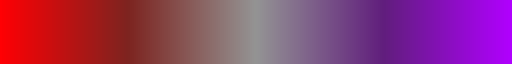

In [52]:
my_gradient

**Comparison between misclassified samples produced by utterance-level modelling layer and original APC**

In [90]:
augment = "squeeze"
num_layer = 3
conf_baseline, conf_uttvec, conf_postfrm,_,_ = get_confusion_val(select_exps, augment)
mode = conf_uttvec

diff_confmat = mode[num_layer-1] - conf_baseline[num_layer-1]
diff_confmat[diff_confmat < 0] = 0
val_a = np.sum(diff_confmat)

diff_confmat = mode[num_layer-1] - conf_baseline[num_layer-1]
diff_confmat[diff_confmat > 0] = 0
val_b = -np.sum(diff_confmat)

diff = val_a - val_b
print("number of samples misclassify by modified version, but not original model:"+str(val_a))
print("number of samples misclassify by original version, but not modified model:"+str(val_b))
print("diff:"+str(diff))
print("rate:"+str(np.round(diff/6904,6)))

# fig, axes = plt.subplots(figsize=(15,15))
# sns.set(font_scale=3)
# test = mode[num_layer-1] - conf_baseline[num_layer-1]
# _ = sns.heatmap(test, cmap=my_gradient)

# axes.set_xlabel('Predicted labels')
# axes.set_ylabel('True labels')

# fig.suptitle("Normalized confusion matrix of speaker identification", fontsize=20)
# # using padding
# fig.tight_layout()

# plt.show()
# fig.savefig(figdir + os.sep + "utt-modelling-spkid-conf.png", dpi=200, bbox_inches='tight')

number of samples misclassify by modified version, but not original model:3631
number of samples misclassify by original version, but not modified model:2668
diff:963
rate:0.139484


# fig:layerwise-phone-classification-statistic

In [102]:
figdir = "./figures/layerwise-phone-classification-statistic"

In [103]:
expfiles = []
for dirpath, subdirs, files in os.walk("../frmcls/exp/frmcls/"):
    for x in files:
        if x.endswith("10-eval.log"):
            expfiles.append(os.path.join(dirpath, x))

In [104]:
exps = []

for file in expfiles:

    args = file.split("/")

    exp = {}
    exp["config"] = {}
    exp["config"]["embedding_mode"] = args[4]
    exp["config"]["connection_mode"] = args[5]

    lookup_layer = {"layer1":1, "layer2":2, "layer3":3}

    if args[6] in ["residual","concat","squeeze"]:
        exp["config"]["augment_mode"] = args[6]
        exp["config"]["layer"] = lookup_layer[args[7]]
        exp["config"]["extract_mode"] = args[8]
    else:
        exp["config"]["augment_mode"] = None
        exp["config"]["layer"] = lookup_layer[args[6]]
        exp["config"]["extract_mode"] = None

    exp["result"] = {}
    with open(file, 'r') as f:
        lines = f.read().splitlines()
        exp_results = [x.strip() for x in lines[-1].split(",")]

        for param in exp_results:
            out = param.split(":")
            param_name =  out[0]
            param_value = float(out[1].strip())
            exp["result"][param_name] = param_value
    
    exps.append(exp)

In [105]:
apc_vanilla = list(filter(lambda x: x["config"]['embedding_mode'] == 'vanilla' and x["config"]["connection_mode"] == "woc", exps))
residual =  list(filter(lambda x: x["config"]['embedding_mode'] == 'temporal' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "residual", exps))
concat =  list(filter(lambda x: x["config"]['embedding_mode'] == 'temporal' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "concat", exps))
squeeze =  list(filter(lambda x: x["config"]['embedding_mode'] == 'temporal' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "squeeze", exps))
residual_wstat =  list(filter(lambda x: x["config"]['embedding_mode'] == 'statistic' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "residual", exps))
concat_wstat =  list(filter(lambda x: x["config"]['embedding_mode'] == 'statistic' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "concat", exps))
squeeze_wstat =  list(filter(lambda x: x["config"]['embedding_mode'] == 'statistic' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "squeeze", exps))

In [106]:
select_exps = apc_vanilla + residual + residual_wstat + concat + concat_wstat + squeeze + squeeze_wstat

In [107]:
viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)

area_color = inferno(0.30)
prefrm_color = inferno(0.15)
postfrm_color = inferno(0.65)
area_wstat_color = viridis(0.30)
prefrm_wstat_color = viridis(0.15)
postfrm_wstat_color = viridis(0.65)

In [108]:
def get_plot_val(exps, augment_mode="residual"):
    loss_baseline = []
    loss_postfrm = []
    loss_prefrm = []
    loss_postfrm_wstat = []
    loss_prefrm_wstat = []

    for exp in exps: 
        if exp["config"]['embedding_mode'] == 'vanilla':
            loss_baseline.append(exp["result"]["rate"])
        if exp["config"]['embedding_mode'] == 'temporal' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="preframe":
            loss_prefrm.append(exp["result"]["rate"])
        if exp["config"]['embedding_mode'] == 'temporal' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="postframe":
            loss_postfrm.append(exp["result"]["rate"])
        if exp["config"]['embedding_mode'] == 'statistic' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="preframe":
            loss_prefrm_wstat.append(exp["result"]["rate"])
        if exp["config"]['embedding_mode'] == 'statistic' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="postframe":
            loss_postfrm_wstat.append(exp["result"]["rate"])

    y1 = loss_baseline
    y2 = loss_postfrm
    y3 = loss_prefrm
    y4 = loss_postfrm_wstat
    y5 = loss_prefrm_wstat

    return y1,y2,y3,y4,y5

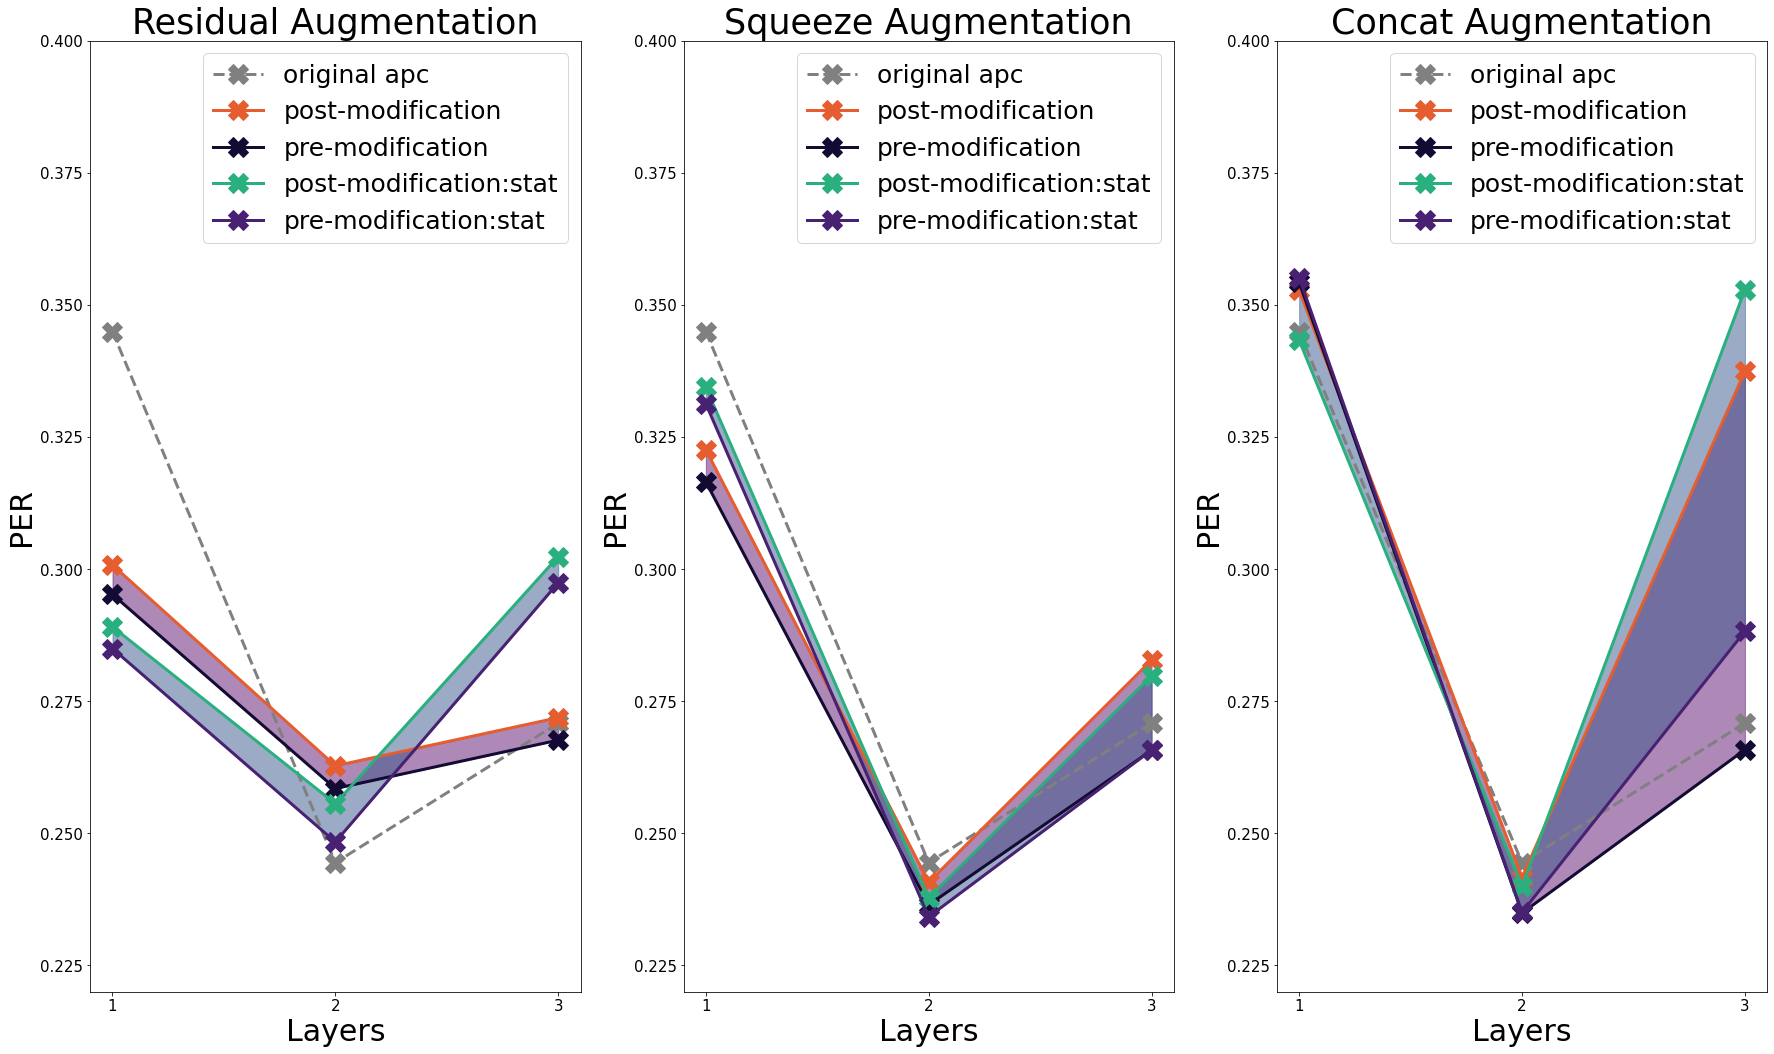

In [109]:
x = np.arange(1,4)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(15)
fig.set_figwidth(25)

y1,y2,y3,y4,y5 = get_plot_val(select_exps,"residual")
ax1.set_title('Residual Augmentation', fontsize=35)
ax1.plot(x, y1,label='original apc', marker = 'X', color ="gray", linewidth=3, linestyle="dashed",markersize=20)
ax1.plot(x, y2,label='post-modification', marker = 'X',markersize=20, linewidth=3, color=postfrm_color, zorder=2)
ax1.plot(x, y3,label='pre-modification', marker = 'X',markersize=20, linewidth=3, color=prefrm_color, zorder=2)
ax1.plot(x, y4,label='post-modification:stat', marker = 'X',markersize=20, linewidth=3, color=postfrm_wstat_color, zorder=3)
ax1.plot(x, y5,label='pre-modification:stat', marker = 'X',markersize=20, linewidth=3, color=prefrm_wstat_color, zorder=3)
ax1.set_xlabel('Layers', fontsize=30)
ax1.set_ylabel('PER', fontsize=30)
ax1.fill_between(x, y2,y3,color=area_color,alpha=.5)
ax1.fill_between(x, y4,y5,color=area_wstat_color,alpha=.5)
ax1.set_xticks(np.arange(1,4))
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylim(0.22,0.40)
ax1.legend(fontsize=25)

y1,y2,y3,y4,y5 = get_plot_val(select_exps,"squeeze")
ax2.set_title('Squeeze Augmentation', fontsize=35)
ax2.plot(x, y1,label='original apc', marker = 'X', color ="gray", linewidth=3, linestyle="dashed",markersize=20)
ax2.plot(x, y2,label='post-modification', marker = 'X',markersize=20, linewidth=3, color=postfrm_color, zorder=2)
ax2.plot(x, y3,label='pre-modification', marker = 'X',markersize=20, linewidth=3, color=prefrm_color, zorder=2)
ax2.plot(x, y4,label='post-modification:stat', marker = 'X',markersize=20, linewidth=3, color=postfrm_wstat_color, zorder=3)
ax2.plot(x, y5,label='pre-modification:stat', marker = 'X',markersize=20, linewidth=3, color=prefrm_wstat_color, zorder=3)
ax2.set_xlabel('Layers', fontsize=30)
ax2.set_ylabel('PER', fontsize=30)
ax2.fill_between(x, y2,y3,color=area_color,alpha=.5)
ax2.fill_between(x, y4,y5,color=area_wstat_color,alpha=.5)
ax2.set_xticks(np.arange(1,4))
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_ylim(0.22,0.40)
ax2.legend(fontsize=25)


y1,y2,y3,y4,y5 = get_plot_val(select_exps,"concat")
ax3.set_title('Concat Augmentation', fontsize=35)
ax3.plot(x, y1,label='original apc', marker = 'X', color ="gray", linewidth=3, linestyle="dashed",markersize=20)
ax3.plot(x, y2,label='post-modification', marker = 'X',markersize=20, linewidth=3, color=postfrm_color, zorder=2)
ax3.plot(x, y3,label='pre-modification', marker = 'X',markersize=20, linewidth=3, color=prefrm_color, zorder=2)
ax3.plot(x, y4,label='post-modification:stat', marker = 'X',markersize=20, linewidth=3, color=postfrm_wstat_color, zorder=3)
ax3.plot(x, y5,label='pre-modification:stat', marker = 'X',markersize=20, linewidth=3, color=prefrm_wstat_color, zorder=3)
ax3.set_xlabel('Layers', fontsize=30)
ax3.set_ylabel('PER', fontsize=30)
ax3.fill_between(x, y2,y3,color=area_color,alpha=.5)
ax3.fill_between(x, y4,y5,color=area_wstat_color,alpha=.5)
ax3.set_xticks(np.arange(1,4))
ax3.tick_params(axis='both', which='major', labelsize=15)
ax3.set_ylim(0.22,0.40)
ax3.legend(fontsize=25)

# using padding
fig.tight_layout(pad=2.0)

plt.show()

fig.savefig(figdir + os.sep + "utt-modelling-wstat-frmcls.png", dpi=200, bbox_inches='tight')

# fig:layerwise-speaker-identification-statistic

In [111]:
figdir = "./figures/layerwise-speaker-identification-statistic"

In [112]:
expfiles = []
for dirpath, subdirs, files in os.walk("../spkid/exp/spkid/"):
    for x in files:
        if x.endswith("20-eval.log"):
            expfiles.append(os.path.join(dirpath, x))

In [113]:
exps = []

for file in expfiles:

    args = file.split("/")

    exp = {}
    exp["config"] = {}
    exp["config"]["embedding_mode"] = args[4]
    exp["config"]["connection_mode"] = args[5]

    lookup_layer = {"layer1":1, "layer2":2, "layer3":3}

    if args[6] in ["residual","concat","squeeze"]:
        exp["config"]["augment_mode"] = args[6]
        exp["config"]["layer"] = lookup_layer[args[7]]
        exp["config"]["extract_mode"] = args[8]
    else:
        exp["config"]["augment_mode"] = None
        exp["config"]["layer"] = lookup_layer[args[6]]
        exp["config"]["extract_mode"] = None

    exp["result"] = {}
    with open(file, 'r') as f:
        lines = f.read().splitlines()
        exp_results = [x.strip() for x in lines[-1].split(",")]

        for param in exp_results:
            out = param.split(":")
            param_name =  out[0]
            param_value = float(out[1].strip())
            exp["result"][param_name] = param_value
    
    exps.append(exp)

In [114]:
apc_vanilla = list(filter(lambda x: x["config"]['embedding_mode'] == 'vanilla' and x["config"]["connection_mode"] == "woc", exps))
residual =  list(filter(lambda x: x["config"]['embedding_mode'] == 'temporal' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "residual", exps))
concat =  list(filter(lambda x: x["config"]['embedding_mode'] == 'temporal' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "concat", exps))
squeeze =  list(filter(lambda x: x["config"]['embedding_mode'] == 'temporal' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "squeeze", exps))
residual_wstat =  list(filter(lambda x: x["config"]['embedding_mode'] == 'statistic' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "residual", exps))
concat_wstat =  list(filter(lambda x: x["config"]['embedding_mode'] == 'statistic' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "concat", exps))
squeeze_wstat =  list(filter(lambda x: x["config"]['embedding_mode'] == 'statistic' and 
                        x["config"]["connection_mode"] == "woc" and x["config"]["augment_mode"] == "squeeze", exps))

In [115]:
def get_plot_val(exps, augment_mode="residual"):
    loss_baseline = []
    loss_postfrm = []
    loss_uttvec = []
    loss_postfrm_wstat = []
    loss_uttvec_wstat = []

    for exp in exps: 
        if exp["config"]['embedding_mode'] == 'vanilla':
            loss_baseline.append(exp["result"]["rate"])
        if exp["config"]['embedding_mode'] == 'temporal' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="utterance-vector":
            loss_uttvec.append(exp["result"]["rate"])
        if exp["config"]['embedding_mode'] == 'temporal' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="postframe":
            loss_postfrm.append(exp["result"]["rate"])
        if exp["config"]['embedding_mode'] == 'statistic' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="utterance-vector":
            loss_uttvec_wstat.append(exp["result"]["rate"])
        if exp["config"]['embedding_mode'] == 'statistic' and  exp["config"]['augment_mode']==augment_mode and exp["config"]["extract_mode"]=="postframe":
            loss_postfrm_wstat.append(exp["result"]["rate"])

    y1 = loss_baseline
    y2 = loss_postfrm
    y3 = loss_uttvec
    y4 = loss_postfrm_wstat
    y5 = loss_uttvec_wstat

    return y1,y2,y3,y4,y5

In [116]:
select_exps = apc_vanilla + residual + residual_wstat + concat + concat_wstat + squeeze + squeeze_wstat

In [117]:
viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)

area_color = viridis(0.30)
uttvec_color = viridis(0.45)
postfrm_color = viridis(0.15)
area_wstat_color = inferno(0.30)
uttvec_wstat_color = inferno(0.45)
postfrm_wstat_color = inferno(0.15)


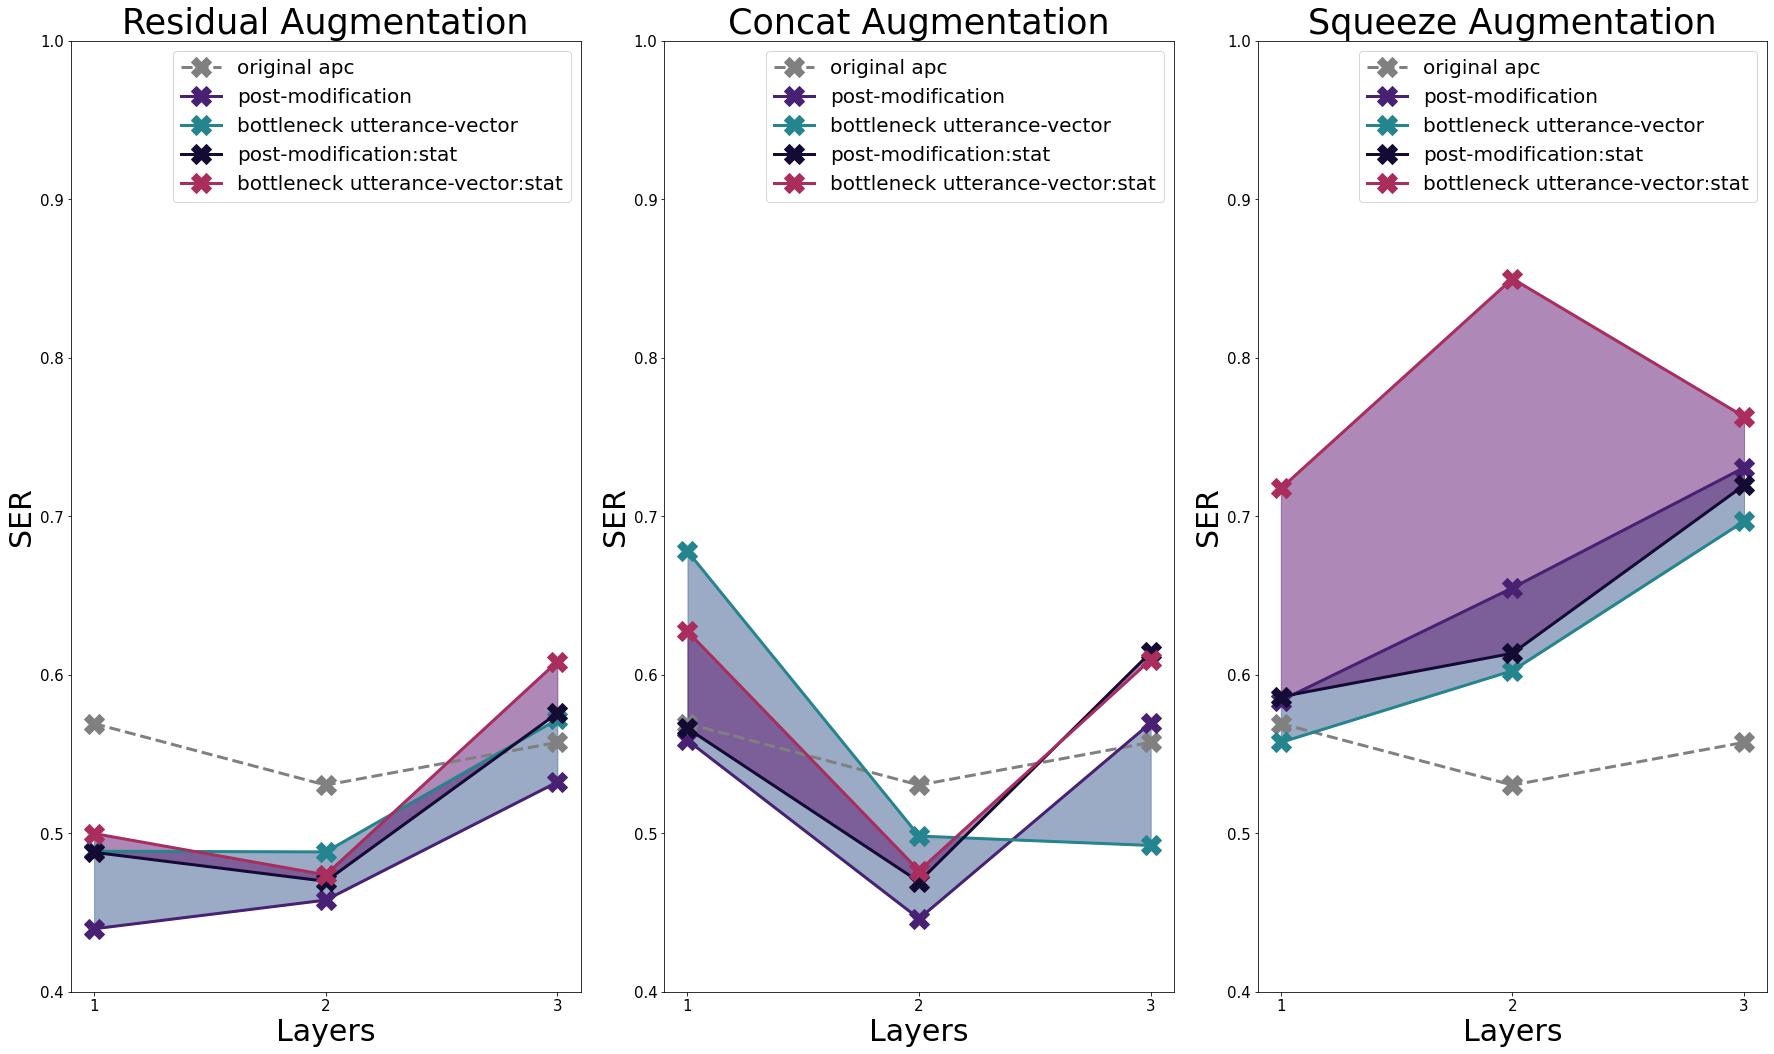

In [122]:
x = np.arange(1,4)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(15)
fig.set_figwidth(25)


y1,y2,y3,y4,y5 = get_plot_val(select_exps,"residual")
ax1.set_title('Residual Augmentation', fontsize=35)
ax1.plot(x, y1,label='original apc', marker = 'X', color ="gray", linewidth=3, linestyle="dashed",markersize=20)
ax1.plot(x, y2,label='post-modification', marker = 'X',markersize=20, linewidth=3, color=postfrm_color)
ax1.plot(x, y3,label='bottleneck utterance-vector', marker = 'X',markersize=20, linewidth=3, color=uttvec_color)
ax1.plot(x, y4,label='post-modification:stat', marker = 'X',markersize=20, linewidth=3, color=postfrm_wstat_color)
ax1.plot(x, y5,label='bottleneck utterance-vector:stat', marker = 'X',markersize=20, linewidth=3, color=uttvec_wstat_color)
ax1.fill_between(x, y2,y3,color=area_color,alpha=.5)
ax1.fill_between(x, y4,y5,color=area_wstat_color,alpha=.5)
ax1.set_xlabel('Layers', fontsize=30)
ax1.set_ylabel('SER', fontsize=30)
ax1.set_xticks(np.arange(1,4))
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylim(0.40,1.00)
ax1.legend(fontsize=20)


y1,y2,y3,y4,y5 = get_plot_val(select_exps,"concat")
ax2.set_title('Concat Augmentation', fontsize=35)
ax2.plot(x, y1,label='original apc', marker = 'X', color ="gray", linewidth=3, linestyle="dashed",markersize=20)
ax2.plot(x, y2,label='post-modification', marker = 'X',markersize=20, linewidth=3, color=postfrm_color)
ax2.plot(x, y3,label='bottleneck utterance-vector', marker = 'X',markersize=20, linewidth=3, color=uttvec_color)
ax2.plot(x, y4,label='post-modification:stat', marker = 'X',markersize=20, linewidth=3, color=postfrm_wstat_color)
ax2.plot(x, y5,label='bottleneck utterance-vector:stat', marker = 'X',markersize=20, linewidth=3, color=uttvec_wstat_color)
ax2.fill_between(x, y2,y3,color=area_color,alpha=.5)
ax2.fill_between(x, y4,y5,color=area_wstat_color,alpha=.5)
ax2.set_xlabel('Layers', fontsize=30)
ax2.set_ylabel('SER', fontsize=30)
ax2.set_xticks(np.arange(1,4))
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_ylim(0.40,1.00)
ax2.legend(fontsize=20)

y1,y2,y3,y4,y5 = get_plot_val(select_exps,"squeeze")
ax3.set_title('Squeeze Augmentation', fontsize=35)
ax3.plot(x, y1,label='original apc', marker = 'X', color ="gray", linewidth=3, linestyle="dashed",markersize=20)
ax3.plot(x, y2,label='post-modification', marker = 'X',markersize=20, linewidth=3, color=postfrm_color)
ax3.plot(x, y3,label='bottleneck utterance-vector', marker = 'X',markersize=20, linewidth=3, color=uttvec_color)
ax3.plot(x, y4,label='post-modification:stat', marker = 'X',markersize=20, linewidth=3, color=postfrm_wstat_color)
ax3.plot(x, y5,label='bottleneck utterance-vector:stat', marker = 'X',markersize=20, linewidth=3, color=uttvec_wstat_color)
ax3.fill_between(x, y2,y3,color=area_color,alpha=.5)
ax3.fill_between(x, y4,y5,color=area_wstat_color,alpha=.5)
ax3.set_xlabel('Layers', fontsize=30)
ax3.set_ylabel('SER', fontsize=30)
ax3.set_xticks(np.arange(1,4))
ax3.tick_params(axis='both', which='major', labelsize=15)
ax3.set_ylim(0.40,1.00)
ax3.legend(fontsize=20)

# using padding
fig.tight_layout(pad=2.0)

plt.show()

fig.savefig(figdir + os.sep + "utt-modelling-wstat-spkid.png", dpi=200, bbox_inches='tight')

# fig:probing-apc-spkid-statistic-pooling

## train

In [69]:
figdir = "./figures/probing-apc-spkid-statistic-pooling"

In [70]:
def fetch_loss_epoch(file_list):
    loss =  {}
    exp_name = os.path.join(*file_list[0].split("/")[:-1])
    loss["exp_name"] = exp_name
    loss["losses"] = []


    for file in file_list:
        count = 0
        current_loss = 0
        with open(file, 'r') as f:
            for line in f:
                line = line.strip()
                if line.startswith("average loss per batch: "):
                    current_loss += float(line.split(":")[-1])
                    count += 1
        loss["losses"].append(current_loss/count)
    return loss["exp_name"], loss["losses"]

In [71]:
augment = "squeeze"  #[residual,concat, squeeze]
mode =  "utterance-vector" #[postframe,utterance-vector]
baseline_folder = "../spkid/exp/spkid/vanilla/woc/layer2"
temporal_folder = "../spkid/exp/spkid/temporal/woc/" + augment + "/layer2/" + mode
statistic_folder = "../spkid/exp/spkid/statistic/woc/" + augment + "/layer2/" + mode

baseline = os.listdir(baseline_folder)
temporal  = os.listdir(temporal_folder)
statistic = os.listdir(statistic_folder)

baseline = [os.path.join(baseline_folder, file) for file in baseline if file.startswith("log")]
baseline.sort(key=natural_keys)
temporal = [os.path.join(temporal_folder , file) for file in temporal if file.startswith("log")]
temporal.sort(key=natural_keys)
statistic = [os.path.join(statistic_folder, file) for file in statistic if file.startswith("log")]
statistic.sort(key=natural_keys)

In [72]:
baseline_name , loss_baseline = fetch_loss_epoch(baseline)
temporal_name , loss_temporal = fetch_loss_epoch(temporal)
statistic_name , loss_statistic = fetch_loss_epoch(statistic)
baseline_name,temporal_name,statistic_name = "APCLayer2-train","UttLayer2-train","UttLayer2-stat-train"

In [73]:
viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)

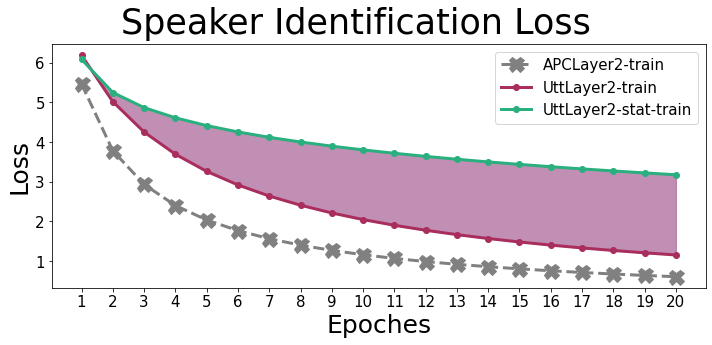

In [74]:
x1, y1 = np.arange(1,21), loss_baseline
x2, y2 = np.arange(1,21), loss_temporal
x3, y3 = np.arange(1,21), loss_statistic

fig = plt.figure(figsize=(10,5))
plt.plot(x1, y1,label=baseline_name, marker = 'X', color = "grey", linewidth=3,markersize=15, linestyle="dashed")
plt.plot(x2, y2,label=temporal_name, marker = 'o', color = inferno(0.45), linewidth=3)
plt.plot(x3, y3,label=statistic_name, marker = 'o', color = viridis(0.65), linewidth=3)
plt.fill_between(x1, y2,y3,color=inferno(0.40),alpha=.5)
plt.xticks(np.arange(1,21),fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
# Setting the fontsize of the axis label to 10
plt.xlabel('Epoches', fontsize=25)
plt.ylabel('Loss', fontsize=25)
plt.suptitle('Speaker Identification Loss', fontsize=35, y=0.95)
plt.tight_layout()
# using padding
fig.tight_layout()
plt.show()


fig.savefig(figdir + os.sep + "APC-TrainLoss-"+augment+"-"+mode, dpi=200, bbox_inches='tight')

## dev

In [75]:
def fetch_loss_epoch(file_list):
    loss =  {}
    exp_name = os.path.join(*file_list[0].split("/")[:-1])
    loss["exp_name"] = exp_name
    loss["losses"] = []

    for file in file_list:
        with open(file, 'r') as f:
            lines = f.read().splitlines()
            last_line = lines[-1]
            loss["losses"].append(float(last_line.split(":")[-1]))
    return loss["exp_name"], loss["losses"]

In [76]:
augment = "squeeze"  #[residual,concat, squeeze]
mode =  "utterance-vector" #[postframe,utterance-vector]
baseline_folder = "../spkid/exp/spkid/vanilla/woc/layer2"
temporal_folder = "../spkid/exp/spkid/temporal/woc/" + augment + "/layer2/" + mode
statistic_folder = "../spkid/exp/spkid/statistic/woc/" + augment + "/layer2/" + mode

baseline = os.listdir(baseline_folder)
temporal  = os.listdir(temporal_folder)
statistic = os.listdir(statistic_folder)

baseline = [os.path.join(baseline_folder, file) for file in baseline if file.endswith("eval.log")]
baseline.sort(key=natural_keys)
temporal = [os.path.join(temporal_folder , file) for file in temporal if file.endswith("eval.log")]
temporal.sort(key=natural_keys)
statistic = [os.path.join(statistic_folder, file) for file in statistic if file.endswith("eval.log")]
statistic.sort(key=natural_keys)

In [77]:
baseline_name , loss_baseline = fetch_loss_epoch(baseline)
temporal_name , loss_temporal = fetch_loss_epoch(temporal)
statistic_name , loss_statistic = fetch_loss_epoch(statistic)
baseline_name,temporal_name,statistic_name = "APCLayer2-dev","UttLayer2-dev","UttLayer2-stat-dev"

In [78]:
viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)

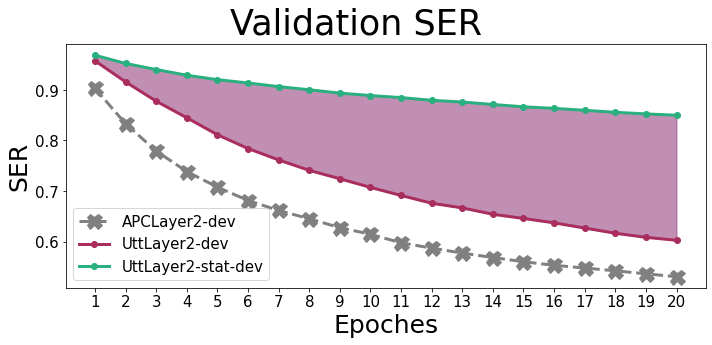

In [79]:
x1, y1 = np.arange(1,21), loss_baseline
x2, y2 = np.arange(1,21), loss_temporal
x3, y3 = np.arange(1,21), loss_statistic

fig = plt.figure(figsize=(10,5))
plt.plot(x1, y1,label=baseline_name, marker = 'X', color = "grey", linewidth=3,markersize=15, linestyle="dashed")
plt.plot(x2, y2,label=temporal_name, marker = 'o', color = inferno(0.45), linewidth=3)
plt.plot(x3, y3,label=statistic_name, marker = 'o', color = viridis(0.65), linewidth=3)
plt.fill_between(x1, y2,y3,color=inferno(0.40),alpha=.5)
plt.xticks(np.arange(1,21),fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
# Setting the fontsize of the axis label to 10
plt.xlabel('Epoches', fontsize=25)
plt.ylabel('SER', fontsize=25)
plt.suptitle('Validation SER', fontsize=35, y=0.95)
plt.tight_layout()
# using padding
fig.tight_layout()
plt.show()


fig.savefig(figdir + os.sep + "APC-DevLoss-"+augment+"-"+mode, dpi=200, bbox_inches='tight')

# fig:tsne-utterance-level-modelling-statistic

In [25]:
figdir = "./figures/tsne-utterance-level-modelling-statistic"

In [26]:
with open('./exp/lstm-512x3/layer2_param-15.pkl', 'rb') as f:
    baseline_reps = pickle.load(f)
with open('./exp/utterance-apc-residual-wstat/layer2_param-15.pkl', 'rb') as f:
    residual_reps = pickle.load(f)
with open('./exp/utterance-apc-concat-wstat/layer2_param-15.pkl', 'rb') as f:
    concat_reps = pickle.load(f)
with open('./exp/utterance-apc-squeeze-wstat/layer2_param-15.pkl', 'rb') as f:
    squeeze_reps = pickle.load(f)

In [27]:
ids = [int(sample['key'].split("-")[0]) for sample in  baseline_reps]
unique_ids = np.unique(ids)

In [28]:
speaker_ids = unique_ids[:10]

mode = 'mean-postframes' # ['utt_embeddings','mean-preframes','mean-postframes']
extract_mode = mode
print(speaker_ids)

selects_label = []
selects_reps_baseline = []
selects_reps_residual = []
selects_reps_concat = []
selects_reps_squeeze = []

for i in range(0,len(ids)):
    key = baseline_reps[i]['key']
    if int(key.split("-")[0]) in speaker_ids:
        key, utt = baseline_reps[i]['key'], baseline_reps[i]['utt_embeddings'].numpy()
        selects_reps_baseline.append(utt)
        key, utt = residual_reps[i]['key'], residual_reps[i][mode].numpy()
        selects_reps_residual.append(utt)
        key, utt = concat_reps[i]['key'], concat_reps[i][mode].numpy()
        selects_reps_concat.append(utt)
        key, utt = squeeze_reps[i]['key'], squeeze_reps[i][mode].numpy()
        selects_reps_squeeze.append(utt)

        selects_label.append(int(key.split("-")[0]))


selects_reps_baseline = np.array(selects_reps_baseline, dtype=float)
selects_reps_residual = np.array(selects_reps_residual, dtype=float)
selects_reps_concat = np.array(selects_reps_concat, dtype=float)
selects_reps_squeeze = np.array(selects_reps_squeeze, dtype=float)

[  84  174  251  422  652  777 1272 1462 1673 1919]


In [32]:
unique_label = list(np.unique(selects_label))
color_range  = np.linspace(0,1,len(np.unique(selects_label)))
color_label  = [unique_label.index(label) for label in selects_label]

In [33]:
mode = "TSNE"
if mode == "PCA":
    pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=50))])
if mode == "TSNE":
    pipeline = Pipeline([('scaling', StandardScaler()), ('tsne', TSNE(n_components=2, learning_rate=100, perplexity=5))])

compressed_reps_baseline = pipeline.fit_transform(selects_reps_baseline)
compressed_reps_residual = pipeline.fit_transform(selects_reps_residual)
compressed_reps_concat = pipeline.fit_transform(selects_reps_concat)
compressed_reps_squeeze = pipeline.fit_transform(selects_reps_squeeze)

/Users/webkasidit/opt/anaconda3/envs/StyleGAN/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/webkasidit/opt/anaconda3/envs/StyleGAN/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/webkasidit/opt/anaconda3/envs/StyleGAN/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/webkasidit/opt/anaconda3/envs/StyleGAN/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


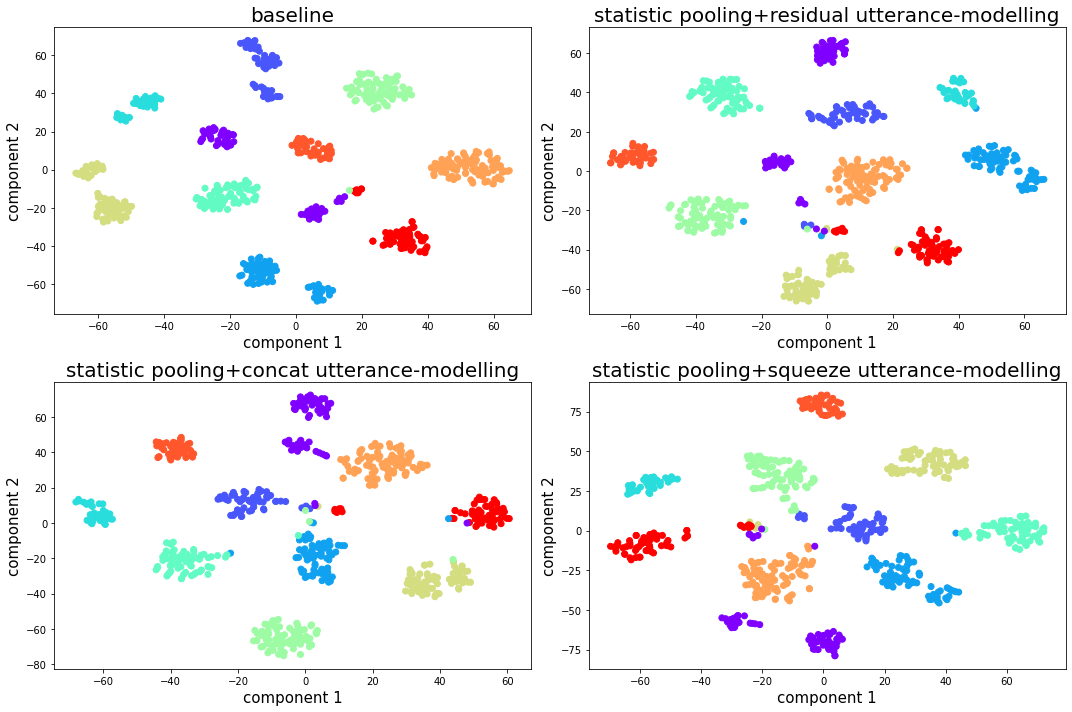

In [34]:
fig, ax = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

ax[0,0].set_title('baseline', fontsize=20)
ax[0,0].scatter(compressed_reps_baseline[:,0], compressed_reps_baseline[:,1], c=color_label , cmap='rainbow')
ax[0,0].set_xlabel('component 1', fontsize=15)
ax[0,0].set_ylabel('component 2', fontsize=15)

ax[0,1].set_title('statistic pooling+residual utterance-modelling', fontsize=20)
ax[0,1].scatter(compressed_reps_residual[:,0], compressed_reps_residual[:,1], c=color_label , cmap='rainbow')
ax[0,1].set_xlabel('component 1', fontsize=15)
ax[0,1].set_ylabel('component 2', fontsize=15)

ax[1,0].set_title('statistic pooling+concat utterance-modelling', fontsize=20)
ax[1,0].scatter(compressed_reps_concat[:,0], compressed_reps_concat[:,1], c=color_label , cmap='rainbow')
ax[1,0].set_xlabel('component 1', fontsize=15)
ax[1,0].set_ylabel('component 2', fontsize=15)

ax[1,1].set_title('statistic pooling+squeeze utterance-modelling', fontsize=20)
ax[1,1].scatter(compressed_reps_squeeze[:,0], compressed_reps_squeeze[:,1], c=color_label , cmap='rainbow')
ax[1,1].set_xlabel('component 1', fontsize=15)
ax[1,1].set_ylabel('component 2', fontsize=15)

# using padding
fig.tight_layout()
plt.show()

fig.savefig(figdir + os.sep + extract_mode + "-" + mode + "-statistic", dpi=200, bbox_inches='tight')